# Keras Sequential Model MNIST

### 1. Import Keras and useful libraries 

In [27]:
import keras as kr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import warnings

In [28]:
#keras is using tensorflow as backend by default

kr.backend.backend()

'tensorflow'

### 2. Import MNIST handwritten numbers dataset

In [29]:
from keras.datasets import mnist

In [30]:
dir(mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'absolute_import',
 'division',
 'get_file',
 'load_data',
 'np',
 'print_function']

In [31]:
(xtrain, ytrain), (xtest, ytest) =  mnist.load_data()

In [32]:
#image shape is 28x28 with 60k training size

xtrain.shape

(60000, 28, 28)

### 3. Visualize the Numbers

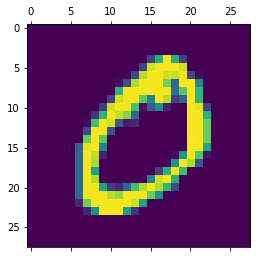

In [33]:
plt.matshow(xtrain[1])

In [34]:
#check number label

ytrain[1]

0

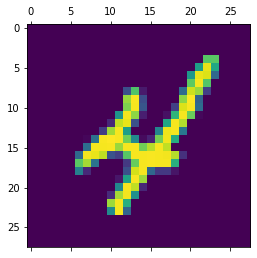

In [35]:
plt.matshow(xtrain[9])

In [36]:
#check number label

ytrain[9]

4

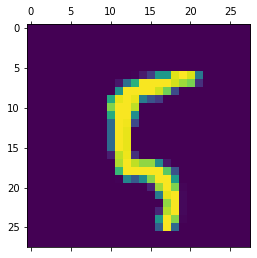

In [37]:
plt.matshow(xtrain[100])

In [38]:
#check number label

ytrain[100]

5

## 3. Normalizing Data

In [39]:
xtrain[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [40]:
#normalizing data between 0 to 1 values for model fitting as data contains values between 0-255

xtrain = xtrain/255
xtest = xtest/255

In [41]:
xtrain[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## 4. Build Model

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [43]:
model = Sequential()

In [44]:
model.add(Flatten(input_shape=[28,28]))

In [45]:
model.add(Dense(100, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [ ]:
model.fit(xtrain, ytrain, epochs = 5)

Epoch 1/5
52128/60000 [=========================>....] - ETA: 0s - loss: 0.0647 - acc: 0.9802

In [49]:
pred = model.predict(xtest)

In [50]:
pred[1]

array([1.5467833e-07, 6.7296269e-04, 9.9722385e-01, 2.0836422e-03,
       7.4583143e-12, 4.2569045e-06, 9.9640329e-07, 9.6677166e-11,
       1.4242815e-05, 1.3083708e-11], dtype=float32)

In [51]:
np.argmax(pred[1])

2

In [52]:
model.evaluate(xtest, ytest)

10000/10000 [==============================] - 1s 60us/step


[0.09285520234024153, 0.9708]